<a href="https://colab.research.google.com/github/ParhamPishro/Some-of-Algorithms-in-Data-Science/blob/main/Test/EscapeRoom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Business Understanding**

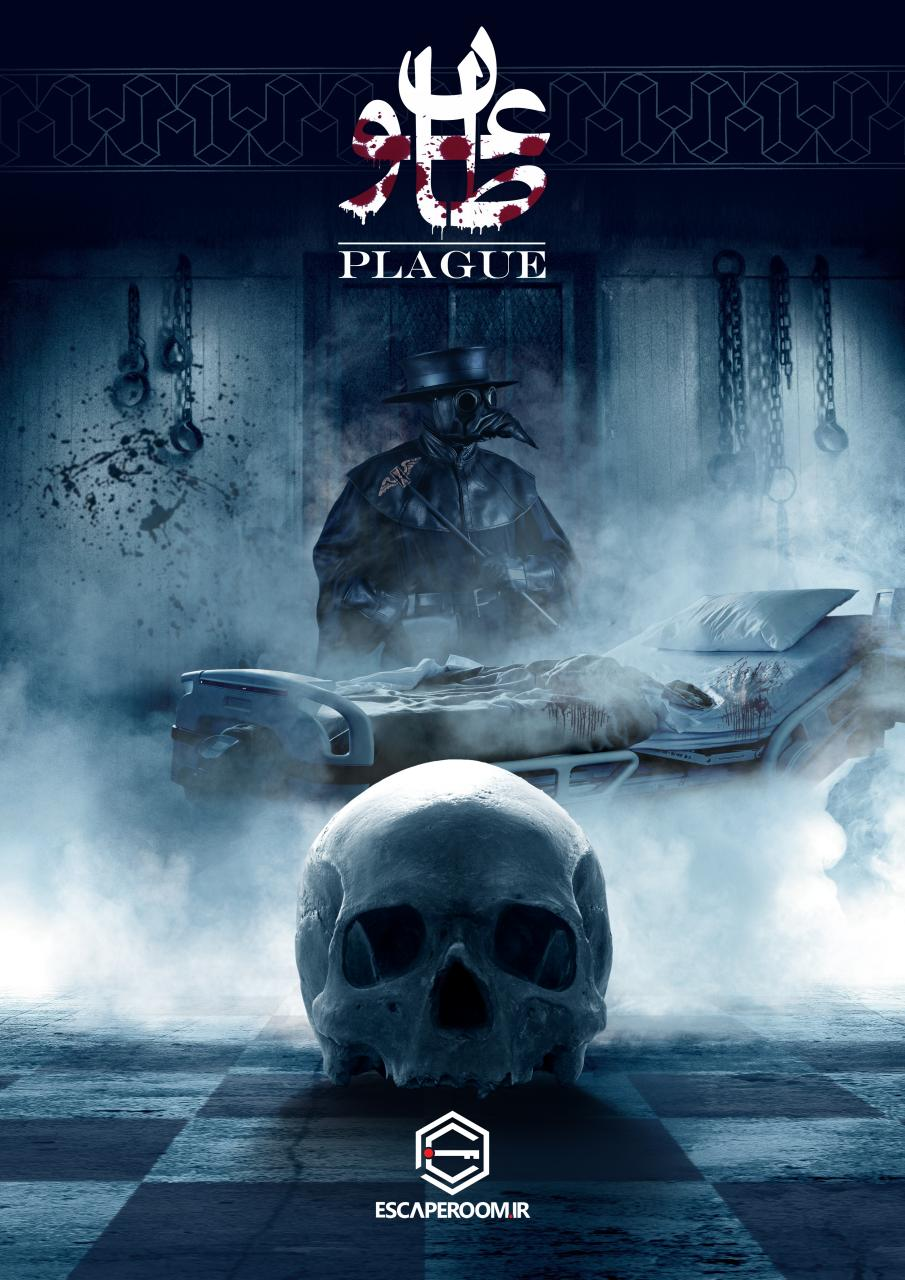

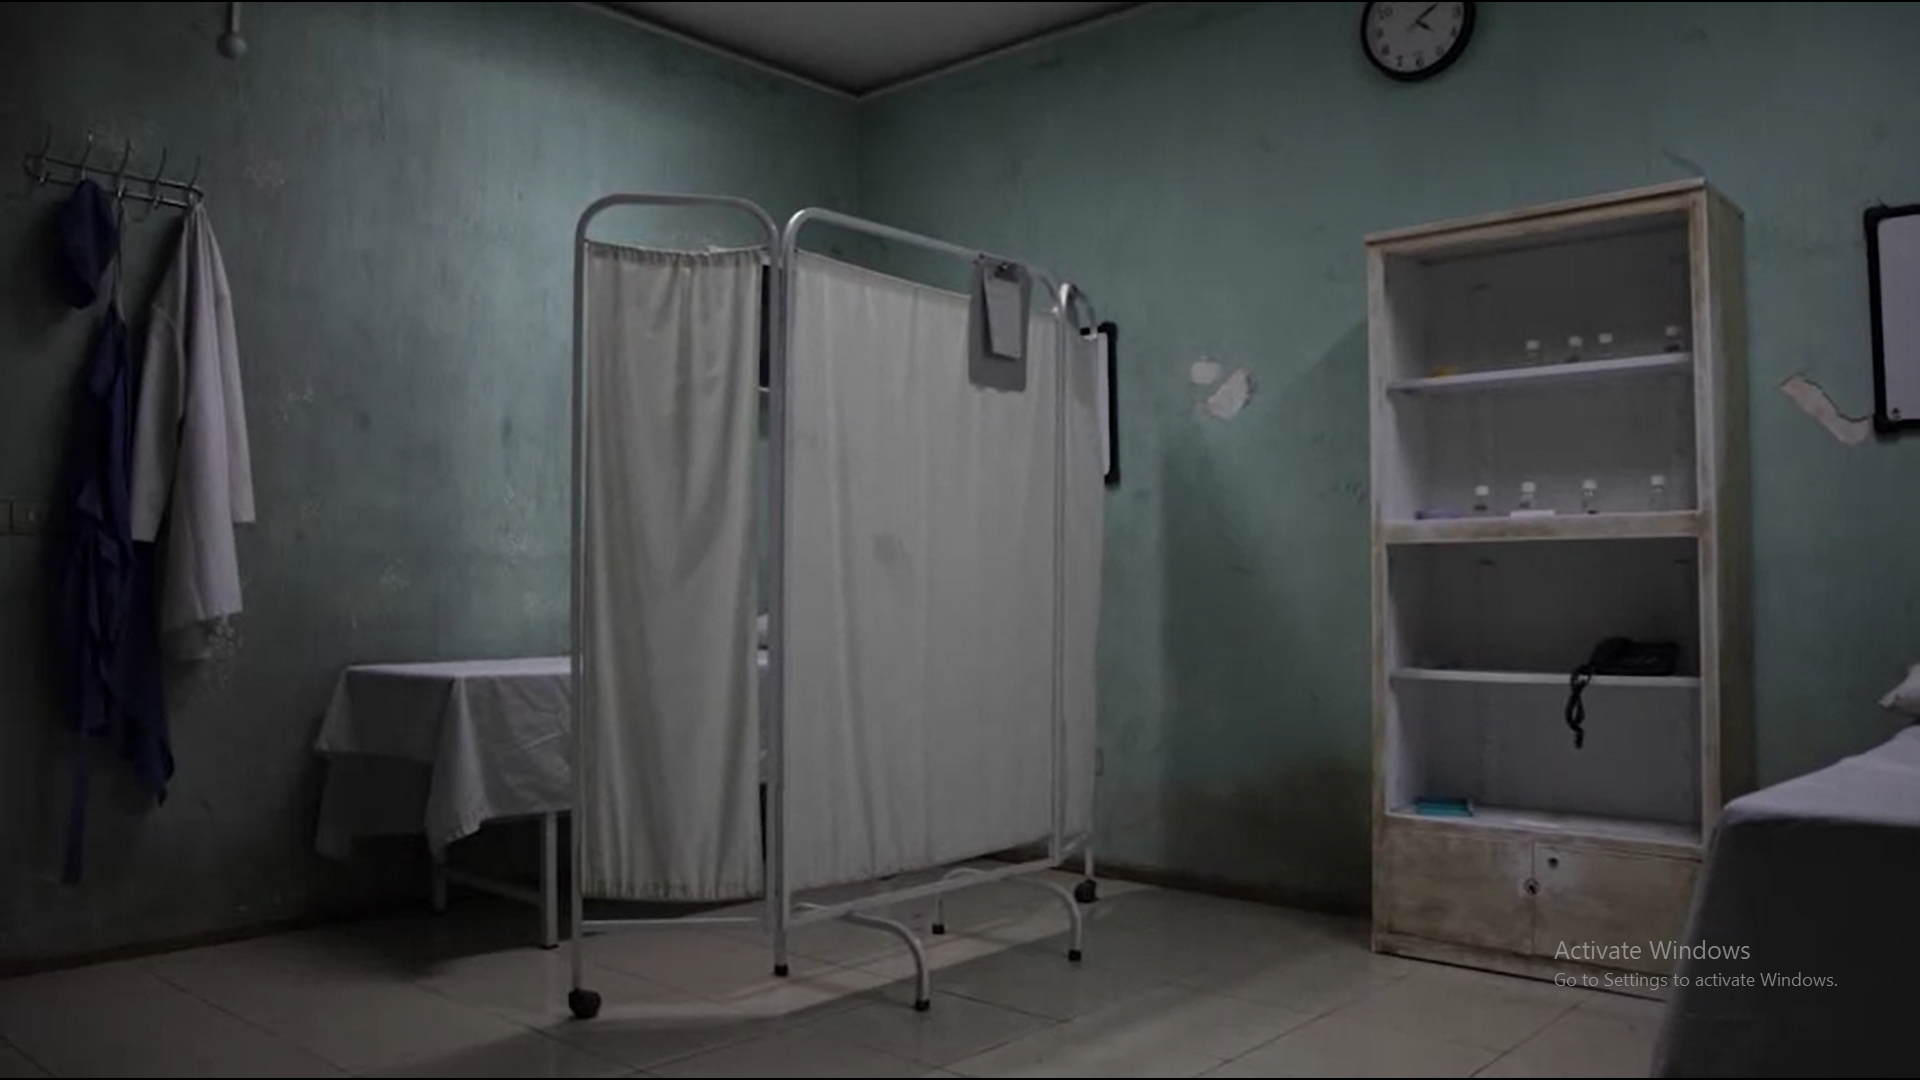

## **Import Libraries & Functions**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay, plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_excel('/content/gdrive/My Drive/DataSet/Escaperoom Data.xlsx')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [ ]:
def compute_confusion_matrix(actual, predicted):
    classes = np.unique(actual)
    confmat = np.zeros((len(classes), len(classes)))
    for i in range(len(classes)):
        for j in range(len(classes)):
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

In [ ]:
def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.3f}".format(y_value)

        ax.annotate(label,                      
                   (x_value, y_value),         
                    xytext=(0, space),          
                    textcoords="offset points", 
                    ha='center',                
                    va=va)                      


## **Data Understanding**

In [ ]:
df.head()

,Number,Male,Female,M/T,F/T,M-F,Ave_Age,Prev_Ed,Ave_Exp,Sum_Exp,Ave_Fear,Hint,Ans,Plague,Time,Turn,Progress,Victory
0,4,2,2,0.50,0.50,0.00,26.75,16,0.50,2,62.50,6,2,0,17,1,87,0
1,5,3,2,0.60,0.40,0.20,31.20,16,1.40,7,77.00,7,4,0,19,2,82,0
2,7,7,0,1.00,0.00,1.00,18.71,12,2.57,18,80.71,10,3,0,21,3,81,0
3,7,4,3,0.57,0.43,0.14,21.86,16,2.14,15,45.00,6,2,0,17,1,102,1
4,5,3,2,0.60,0.40,0.20,26.80,21,3.60,18,66.00,3,0,0,21,3,111,1


In [ ]:
df.shape

(611, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    611 non-null    int64  
 1   Male      611 non-null    int64  
 2   Female    611 non-null    int64  
 3   M/T       611 non-null    float64
 4   F/T       611 non-null    float64
 5   M-F       611 non-null    float64
 6   Ave_Age   611 non-null    float64
 7   Prev_Ed   611 non-null    int64  
 8   Ave_Exp   611 non-null    float64
 9   Sum_Exp   611 non-null    int64  
 10  Ave_Fear  611 non-null    float64
 11  Hint      611 non-null    int64  
 12  Ans       611 non-null    int64  
 13  Plague    611 non-null    int64  
 14  Time      611 non-null    int64  
 15  Turn      611 non-null    int64  
 16  Progress  611 non-null    int64  
 17  Victory   611 non-null    int64  
dtypes: float64(6), int64(12)
memory usage: 86.0 KB


In [ ]:
df.isnull().sum()

Number      0
Male        0
Female      0
M/T         0
F/T         0
M-F         0
Ave_Age     0
Prev_Ed     0
Ave_Exp     0
Sum_Exp     0
Ave_Fear    0
Hint        0
Ans         0
Plague      0
Time        0
Turn        0
Progress    0
Victory     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,611.0,5.135843,1.170488,3.00,4.00,5.00,6.00000,8.00
Male,611.0,2.747954,1.554045,0.00,2.00,3.00,4.00000,7.00
Female,611.0,2.387889,1.654141,0.00,1.00,2.00,3.00000,7.00
M/T,611.0,0.544599,0.292208,0.00,0.33,0.50,0.75000,1.00
F/T,611.0,0.455385,0.292196,0.00,0.25,0.50,0.67000,1.00
M-F,611.0,0.088740,0.589079,-1.00,-0.33,0.00,0.50000,1.00
Ave_Age,611.0,22.760773,4.174704,14.33,19.64,22.56,25.10000,33.95
Prev_Ed,611.0,14.504092,2.552639,9.00,12.00,14.00,16.00000,21.00
Ave_Exp,611.0,2.317400,2.419431,0.00,0.50,1.50,3.46315,11.90
Sum_Exp,611.0,10.126023,10.508958,0.00,3.00,6.00,15.00000,51.00


## **Preprocessing**

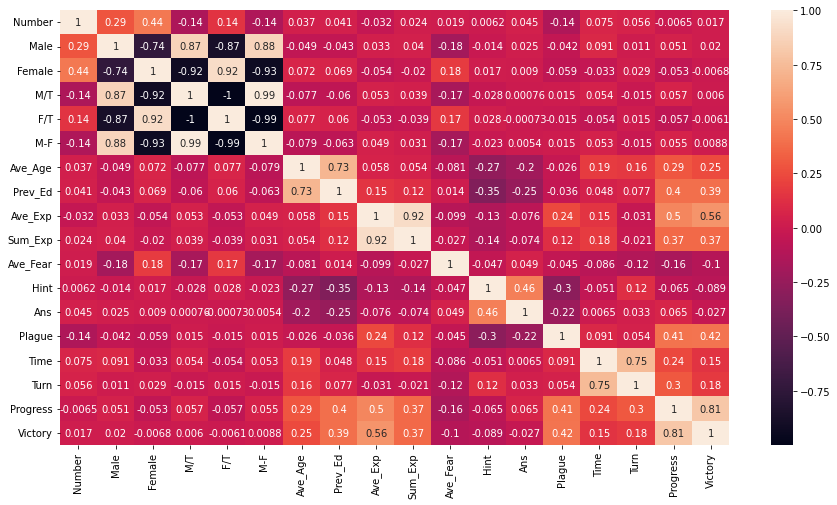

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.drop(["Male", "Female", "M/T", "F/T", "Sum_Exp", "Time", "Turn"], inplace=True, axis=1)
df

,Number,M-F,Ave_Age,Prev_Ed,Ave_Exp,Ave_Fear,Hint,Ans,Plague,Progress,Victory
0,4,0.00,26.75,16,0.50,62.50,6,2,0,87,0
1,5,0.20,31.20,16,1.40,77.00,7,4,0,82,0
2,7,1.00,18.71,12,2.57,80.71,10,3,0,81,0
3,7,0.14,21.86,16,2.14,45.00,6,2,0,102,1
4,5,0.20,26.80,21,3.60,66.00,3,0,0,111,1
...,...,...,...,...,...,...,...,...,...,...,...
606,5,-0.20,22.20,14,0.30,63.00,5,3,0,88,0
607,5,0.60,17.60,12,0.33,65.00,5,1,0,80,0
608,5,-0.60,24.10,16,5.10,82.00,6,1,0,91,0
609,4,0.50,30.20,21,2.65,82.00,4,1,0,102,1


**Outlier**

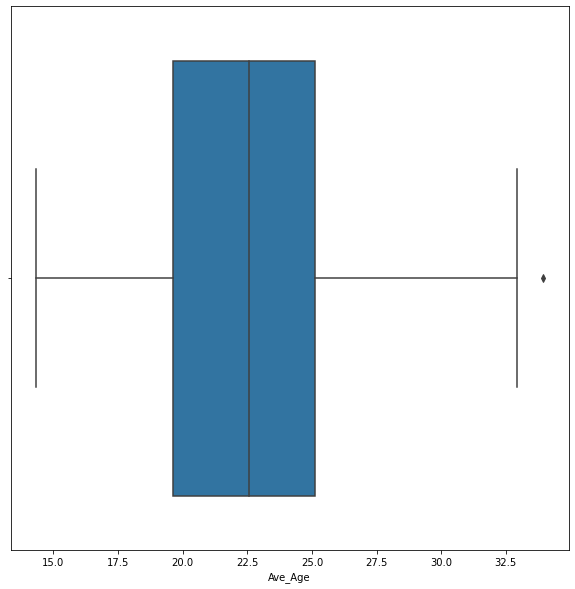

In [ ]:
sns.boxplot(x='Ave_Age', data=df)

In [ ]:
df[df["Ave_Age"]>33]

,Number,M-F,Ave_Age,Prev_Ed,Ave_Exp,Ave_Fear,Hint,Ans,Plague,Progress,Victory
539,5,-0.6,33.95,16,2.546,61.0,3,0,1,126,1


In [ ]:
df["Ave_Age"][df["Ave_Age"] == 33.95 ] = 33

<ipython-input-160-bb3538eb55ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ave_Age"][df["Ave_Age"] == 33.95 ] = 33


**Tarin-Test Split**

In [ ]:
X = df.values[:,:9]
Y = df.values[:,10:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

##**Supervised Learning**

**Logistic Regression**

In [ ]:
logregression_classifier = LogisticRegression()
logregression_classifier.fit(X_train, Y_train)
logregression_predicated = logregression_classifier.predict(X_test)
accuracy_score(Y_test, logregression_predicated)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8455284552845529

**SVM (Support Vector Machine)**

In [ ]:
svm_classifier = LinearSVC()
svm_classifier.fit(X_train, Y_train)
svm_predicated = svm_classifier.predict (X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**ANN (Artificial Neural Network)**

In [ ]:
mlp_classifier = MLPClassifier(random_state=1, max_iter=300)
mlp_classifier.fit(X_train, Y_train)
mlp_predicated = mlp_classifier.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


**Decision Tree**

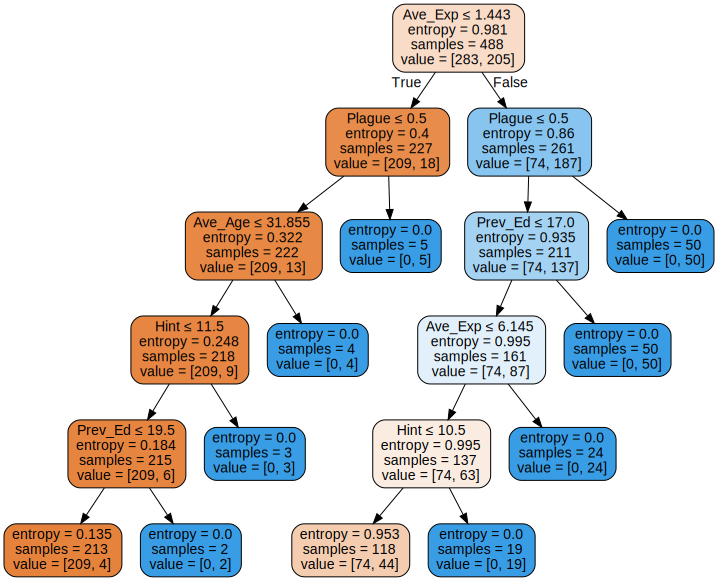

In [ ]:
decision_classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 1, splitter='best',max_depth=5)
decision_classifier = decision_classifier.fit(X_train, Y_train)
decision_tree_predicated = decision_classifier.predict(X_test)

dot_data = tree.export_graphviz(decision_classifier, out_file=None,feature_names=list(df.columns[:9]), filled=True,rounded=True,special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

**Random Forest**

<ipython-input-166-6f81c0144f7c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_classifier.fit(X_train, Y_train)


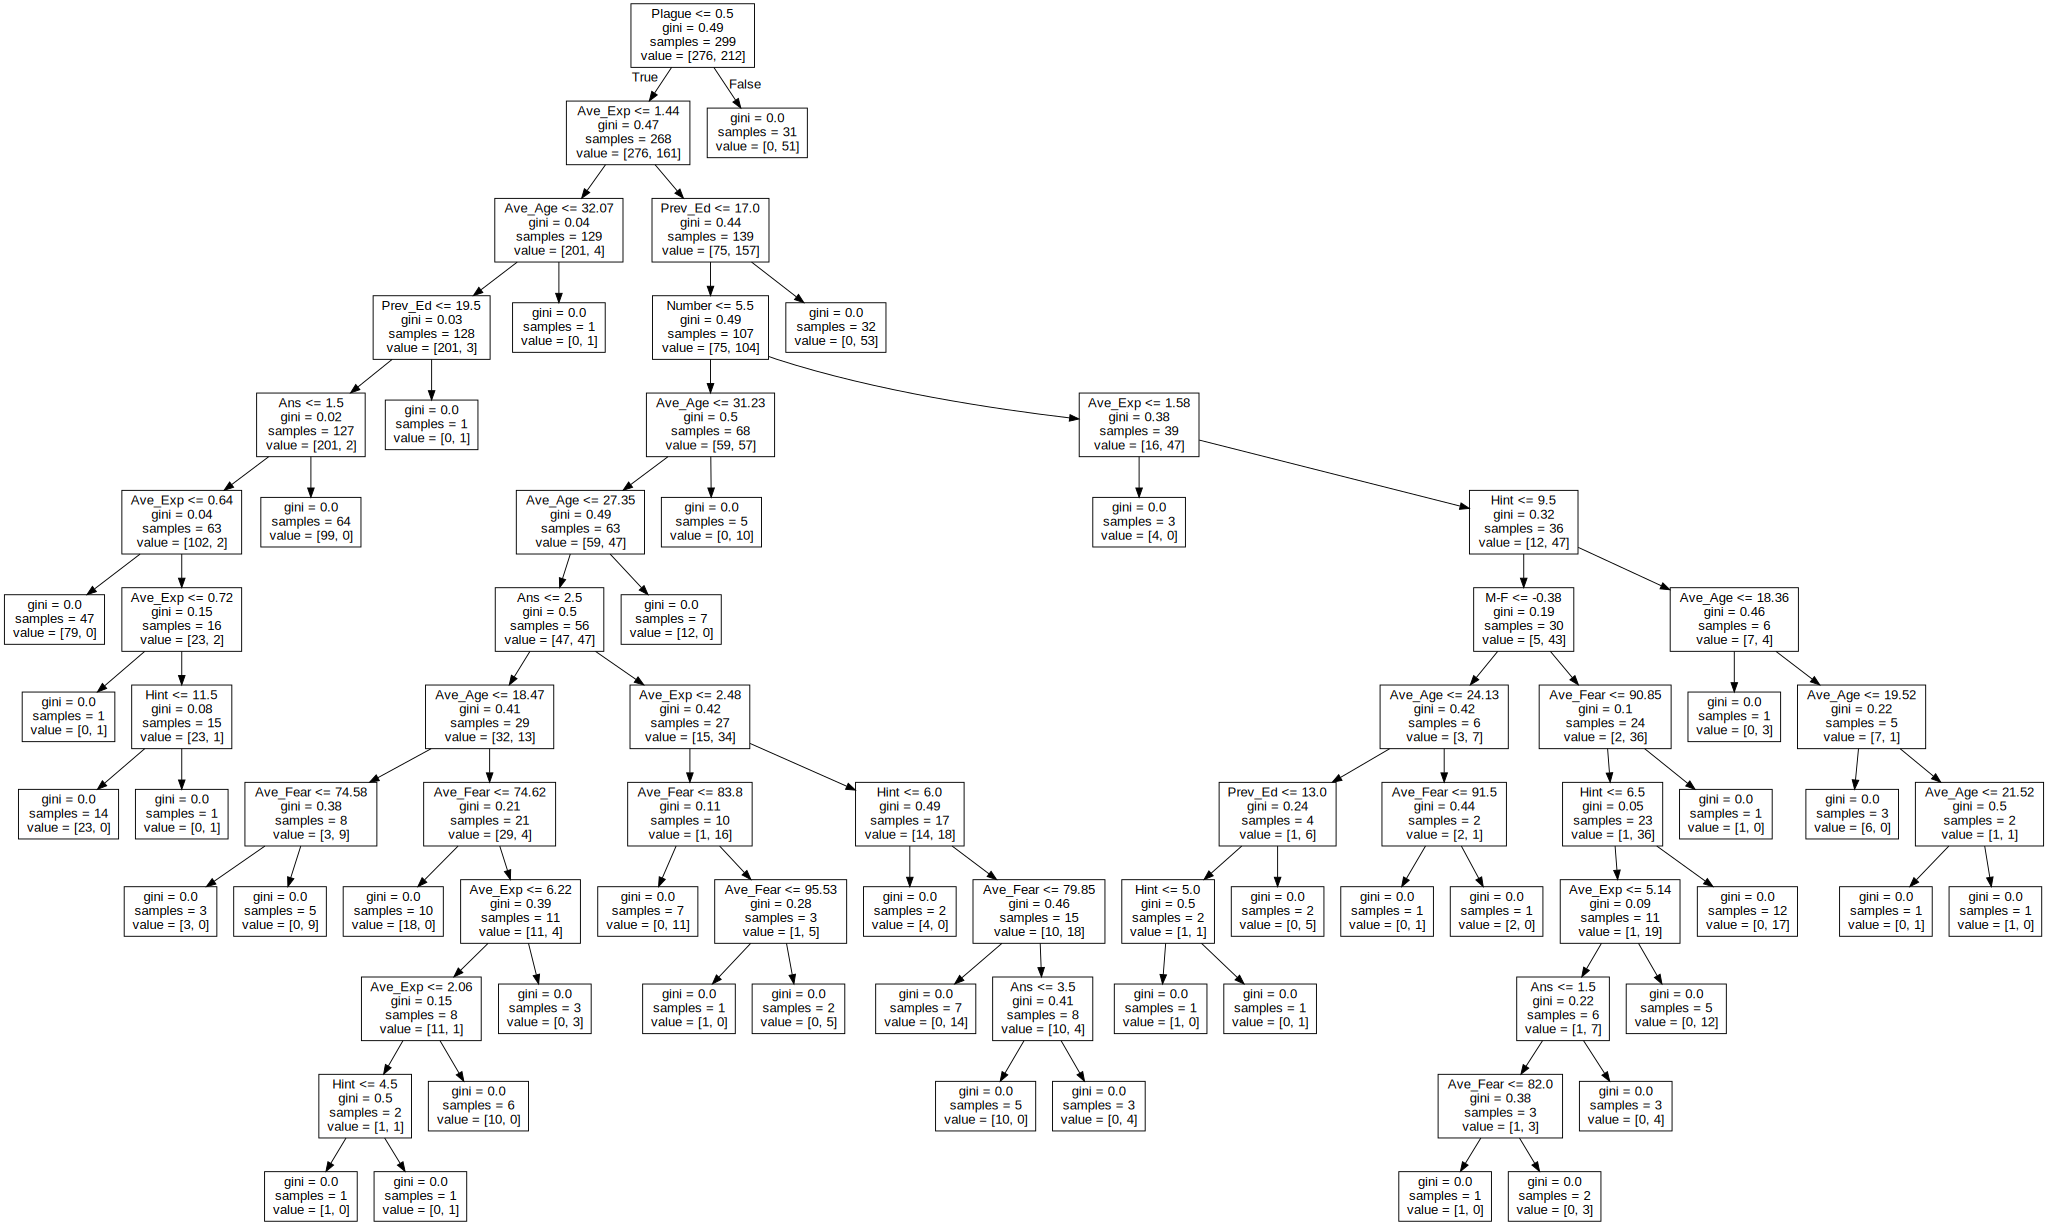

In [ ]:
forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train, Y_train)
forest_predicated = forest_classifier.predict(X_test)

dot_data = tree.export_graphviz(forest_classifier.estimators_[0], out_file=None,feature_names=list(df.columns[:9]) ,precision = 2, filled = False)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## **Unsupervised Learning**

**K-Means**

In [ ]:
X_numerical = df[["Number", "M-F", "Ave_Age", "Prev_Ed", "Ave_Fear", "Hint", "Ans"]]

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_numerical)

KMeans(n_clusters=2)

In [ ]:
y_pred = kmeans.predict(X_numerical)
accuracy_score(Y, y_pred)

0.46153846153846156

## **Evaluation**

**ROC Curve & AUC**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


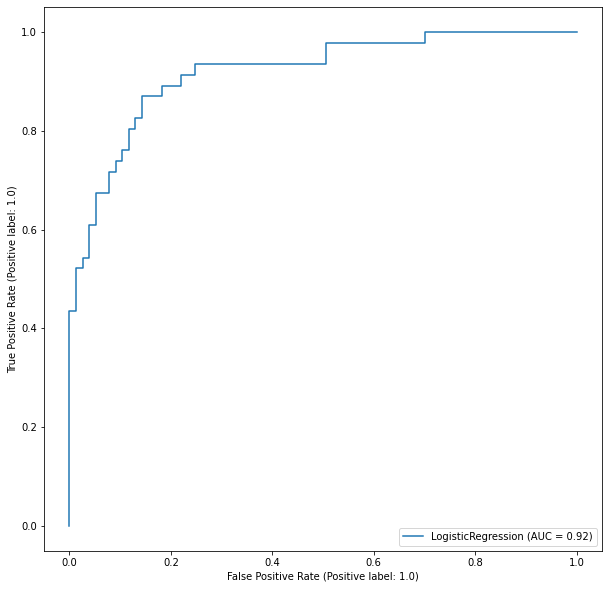

In [ ]:
plot_roc_curve(logregression_classifier, X_test, Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


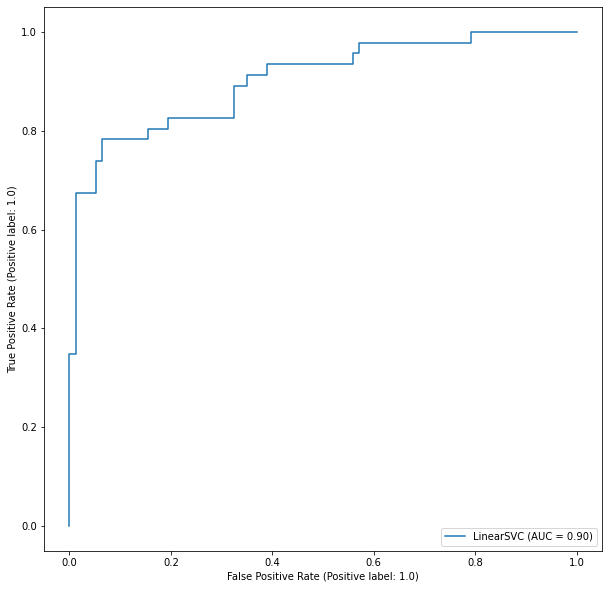

In [ ]:
plot_roc_curve(svm_classifier, X_test, Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


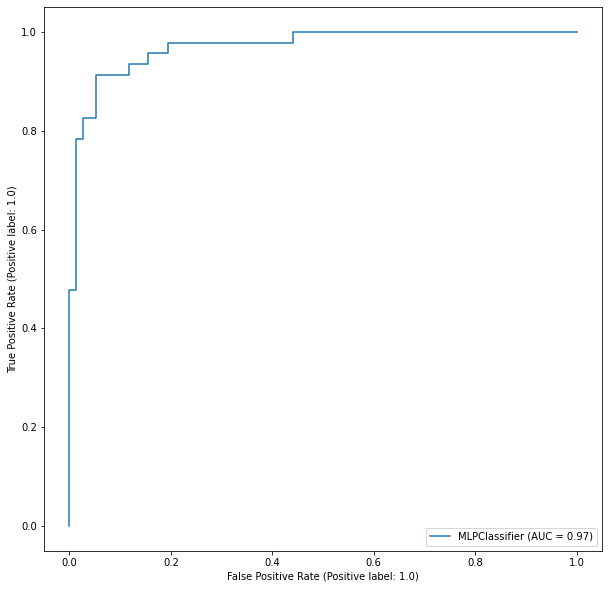

In [ ]:
plot_roc_curve(mlp_classifier, X_test, Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


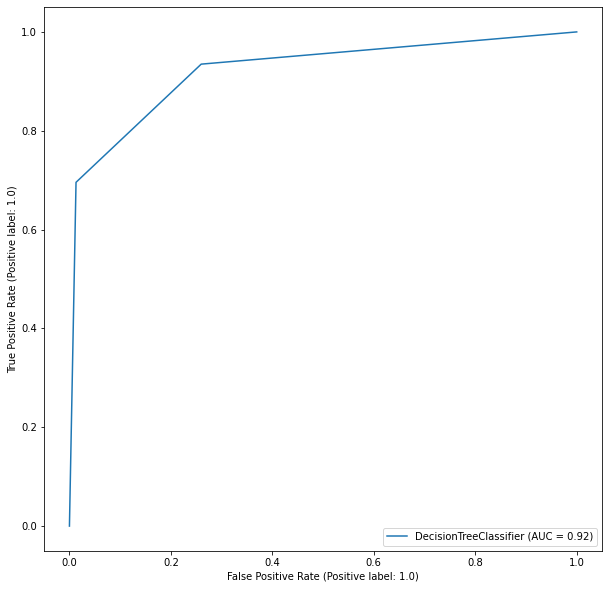

In [ ]:
plot_roc_curve(decision_classifier, X_test, Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


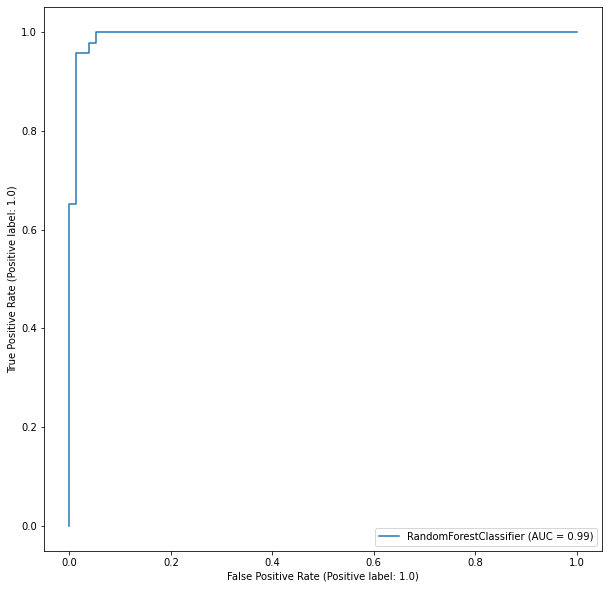

In [ ]:
plot_roc_curve(forest_classifier, X_test, Y_test)

**Confusion Matrix**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

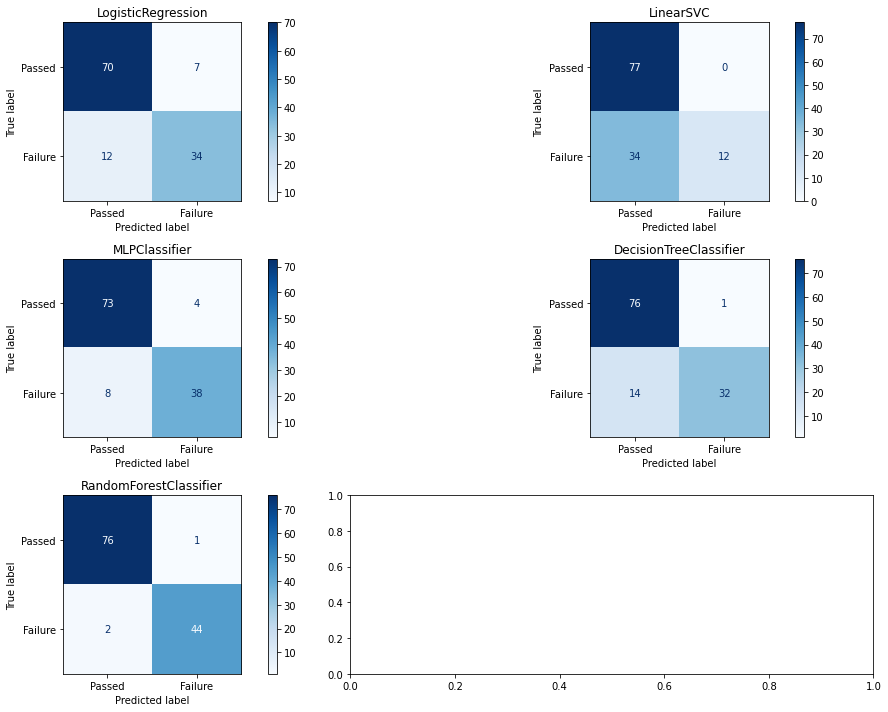

In [ ]:
classifiers = [logregression_classifier, svm_classifier, mlp_classifier, decision_classifier, forest_classifier]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
i=0
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, Y_test, ax=ax, cmap='Blues', display_labels=['Passed','Failure'])
    ax.title.set_text(type(cls).__name__)
   
plt.tight_layout()  
plt.show()

In [ ]:
print("Log Regression (Test):", accuracy_score(Y_test, logregression_predicated))

print("SVM (Test):", accuracy_score(Y_test, svm_predicated))

print("ANN (Test):", accuracy_score(Y_test, mlp_predicated))

print("Decision Tree (Test):", accuracy_score(Y_test, decision_tree_predicated))

print("ANN (Test):", accuracy_score(Y_test, forest_predicated))


Log Regression (Test): 0.8455284552845529
SVM (Test): 0.7235772357723578
ANN (Test): 0.9024390243902439
Decision Tree (Test): 0.8780487804878049
ANN (Test): 0.975609756097561
